In [124]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.sparse as sps
from sklearn.feature_selection import SelectFromModel
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import itertools

In [125]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #rcParams['figure.figsize'] = 6, 6
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [126]:
bins = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.5632754522868506],
        [9.5632754522868506, np.inf]]

bins5 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames5 = ['very bad', 'bad', 'average', 'good', 'very good']

bins4 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames4 = ['bad', 'average', 'good', 'very good']

bins3 = [[-np.inf, 8],
        [8,9.5],
        [9.5, np.inf]]
bnames3 = ['bad', 'average', 'good']

bins2 = [[-np.inf, 9],
        [9, np.inf]]

bnames2 = ['below', 'above']

In [104]:
def scoreLabel(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            return i
def scoreLabelOneHot(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            retVec = np.zeros(len(bins))
            retVec[i] = 1
            return retVec

In [6]:
#featureMatrix = sps.load_npz('./Datasets_2/Regression_Features.npz')
featureMatrix = sps.load_npz('./Feature Selected/Regression_Feat_Selection_VarThr.npz')
labels = np.load('./Datasets_2/Regression_Labels.npz')['arr_0']

In [130]:
bins = bins4
bnames = bnames4
fname = 'bin2classification.png'

#clsLabels = np.array([scoreLabelOneHot(i, bins) for i in labels])
clsLabels = np.array([scoreLabel(i, bins) for i in labels])

cnt = collections.Counter(clsLabels)
i = 0
for c in cnt:
    print bnames[i], 1.0 * cnt[c] / len(clsLabels)
    i+=1

bad 0.203876923579
average 0.287115793938
good 0.260024628332
very good 0.248982654151


In [122]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,clsLabels,test_size=.33,random_state=42)
train = MaxAbsScaler().fit_transform(train)
test = MaxAbsScaler().fit_transform(test)

cls = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
#cls = OneVsRestClassifier(LogisticRegression(class_weight='balanced'))

cls.fit(train,train_labels)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

Normalized confusion matrix
[[ 0.73888749  0.26111251]
 [ 0.21848454  0.78151546]]


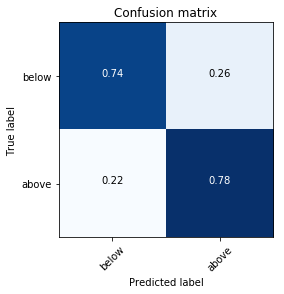

In [123]:
test_predict = cls.predict(test)

cm = confusion_matrix(test_labels,test_predict).astype(float)
plot_confusion_matrix(cm.astype(np.int),bnames, normalize=True)
plt.savefig(fname)
plt.show()

# Results

Lreg

[ 0.95891481  0.04108519]

[ 0.0645503  0.9354497]

LREG SGD

[ 0.95610143  0.04389857]

[ 0.06929303  0.93070697]

KBest

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]

SVC

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]

Var Thr

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]